## Calculation of mutual information for different parts of the dataset

In the this experiment we show the influence of calculating mutual information over different parts of the dataset. Mutual information can be calculated either over the training, the testing or the full dataset. Moreover, we look at the influcence of varying the activation between `tanh` and `ReLU` under these different settings. 

These experiments belong to cohort 4.

In [1]:
import sys
sys.path.append('../..')
from deep_bottleneck.eval_tools.experiment_loader import ExperimentLoader
from deep_bottleneck.eval_tools.utils import format_config, find_differing_config_keys
import matplotlib.pyplot as plt
from io import BytesIO

In [2]:
loader = ExperimentLoader()

We look at the different infoplane plots.

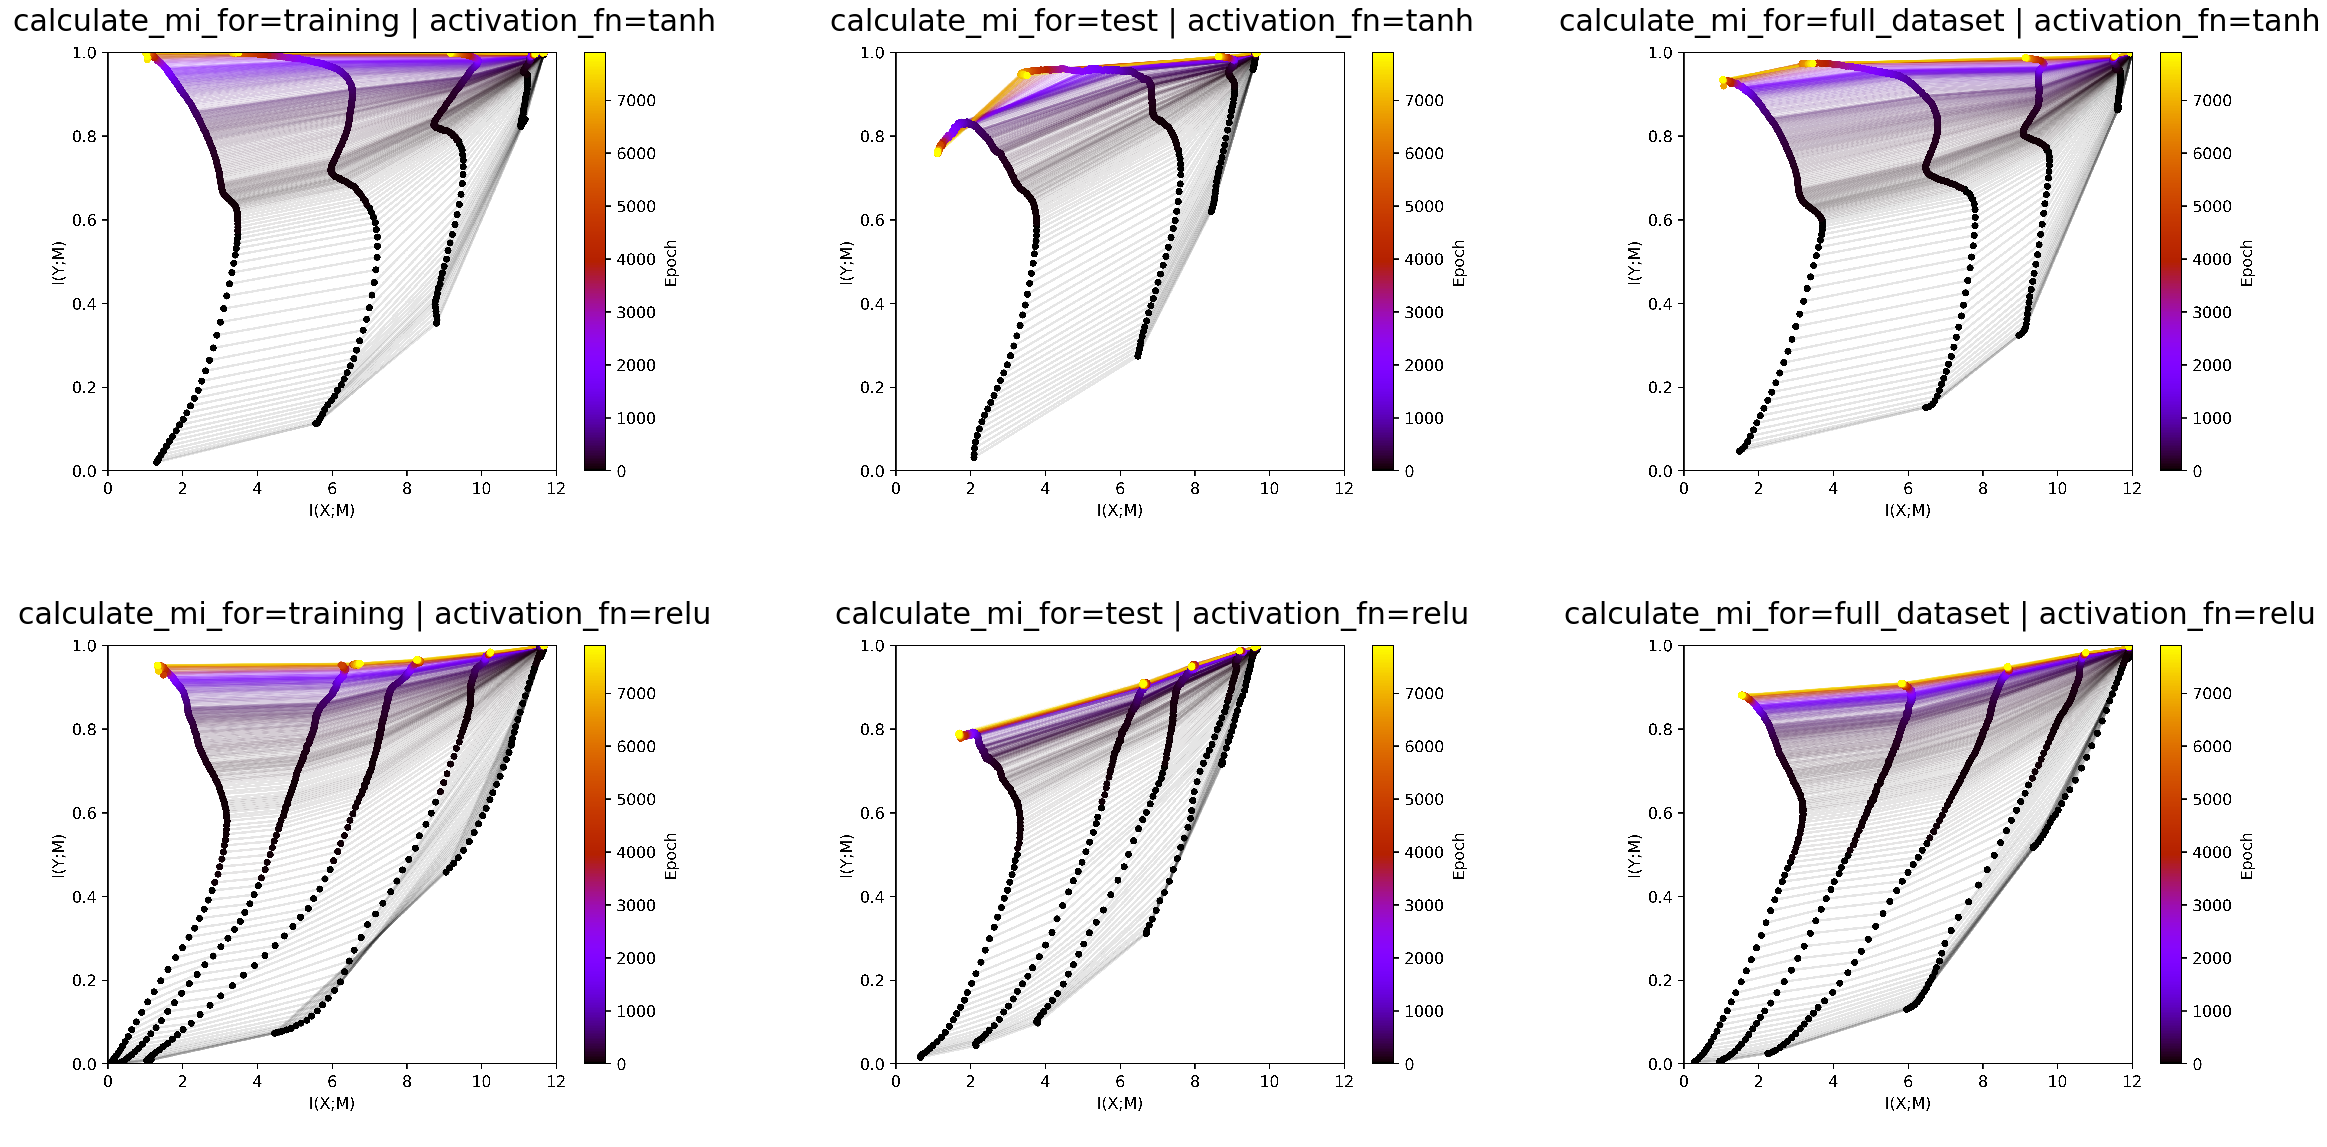

In [3]:
fig, ax = plt.subplots(2,3, figsize=(40, 20))
ax = ax.flat

experiment_ids = [209, 206, 208, 207, 204, 205]
experiments = loader.find_by_ids(experiment_ids)
differing_config_keys = find_differing_config_keys(experiments)

for i, experiment in enumerate(experiments):
    img = plt.imread(BytesIO(experiment.artifacts['infoplane'].content))
    ax[i].axis('off')
    ax[i].imshow(img)
    ax[i].set_title(format_config(experiment.config, *differing_config_keys),
                    fontsize=30)
    

We can see in test data that `tanh` is overfitting at the end. We also see that `ReLU` has lower training than test accuracy as it has less mutual information with the test data than with the train data. These details get lost when estmating mutual information on the full dataset. It is more a smoothed version of both plots, which is less interpretable. Therefore we conclude that it makes most sense to look at the infoplanes for both test and train data. 

The infoplane for test data should give more insights into the generalization dynamics. The infoplane on the training data should give insights into the training dynamics.

The overfitting of the tanh can also be seen in the develepment of training and test accuracy.

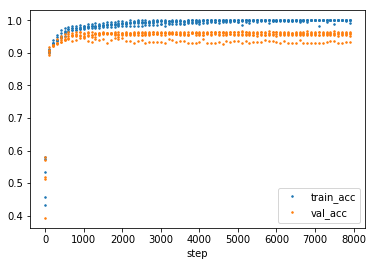

In [4]:
import pandas as pd
import numpy as np

experiment = loader.find_by_id(206)
df = pd.DataFrame(data=np.array([experiment.metrics['training.accuracy'].values, experiment.metrics['validation.accuracy'].values]).T,
                  index=experiment.metrics['validation.accuracy'].index,
                  columns=['train_acc', 'val_acc'])

df[::100].plot(linestyle='', marker='.', markersize=3)

The general configuration for the experiments.

In [5]:
variable_config_dict = {k: '<var>' for k in differing_config_keys}
config = experiment.config
config.update(variable_config_dict)
config

{'activation_fn': '<var>',
 'architecture': [10, 7, 5, 4, 3],
 'batch_size': 256,
 'calculate_mi_for': '<var>',
 'callbacks': [],
 'dataset': 'datasets.harmonics',
 'discretization_range': 0.001,
 'epochs': 8000,
 'estimator': 'mi_estimator.upper',
 'learning_rate': 0.0004,
 'model': 'models.feedforward',
 'n_runs': 5,
 'optimizer': 'adam',
 'plotters': [['plotter.informationplane', []],
  ['plotter.snr', []],
  ['plotter.informationplane_movie', []],
  ['plotter.activations', []]],
 'regularization': False,
 'seed': 0}